In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train , Y_train) , (X_test , Y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_test)

10000

In [4]:
len(X_train)

60000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train=X_train/255
X_test=X_test/255

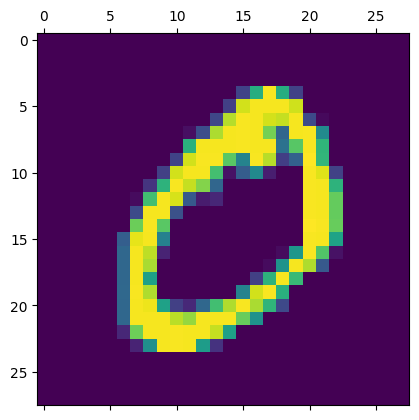

In [7]:
plt.matshow(X_train[1])

In [8]:
Y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [10]:
X_train_flattened.shape
X_test_flattened.shape

(10000, 784)

In [11]:
model=keras.Sequential([
    keras.layers.Dense(120, input_shape=(784,),activation='relu'),
     #also increase the no. of params. #also increase the network size.
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
   
    keras.layers.Dense(10, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,Y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2577 - accuracy: 0.9240
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1088 - accuracy: 0.9665
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0788 - accuracy: 0.9757
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0604 - accuracy: 0.9806
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0489 - accuracy: 0.9844
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0430 - accuracy: 0.9862
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0333 - accuracy: 0.9892
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0302 - accuracy: 0.9903
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0288 - accuracy: 0.9901
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.024

######  **the accuracy with one layer/15 epochs is1s 2ms/step - loss: 0.2658 - accuracy: 0.9285[0.2657902240753174, 0.9284999966621399]**

######  **the accuracy improved from previous to 0.9480000138282776 after using more hidden layers and adding activation**

######  **the accuracy decreased while adding dropout**

###### **the accuracy still decreased even after adding more and more layers**

###### **accurcy increased when  keras.layers.Dense(120, input_shape=(784,),activation='relu'),**

In [12]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 0s 716us/step - loss: 0.2691 - accuracy: 0.9237


[0.26909559965133667, 0.9236999750137329]

In [13]:
y_predicted=model.predict(X_test_flattened)
y_predicted

313/313 [==============================] - 0s 618us/step


array([[2.1261667e-04, 5.9630129e-05, 1.9462307e-03, ..., 9.8429799e-01,
        1.7508368e-05, 7.6503027e-03],
       [7.0228170e-06, 2.0155576e-05, 9.9321979e-01, ..., 5.5010525e-05,
        4.3324064e-05, 5.9715912e-09],
       [1.4463055e-07, 9.9267709e-01, 1.8978385e-03, ..., 8.2989770e-04,
        2.7920415e-03, 1.1624012e-06],
       ...,
       [6.6577952e-05, 2.8156084e-05, 1.2425358e-03, ..., 3.0773960e-02,
        4.2835629e-04, 2.5631042e-02],
       [9.5378943e-03, 2.5863142e-03, 1.4526349e-03, ..., 1.5496854e-04,
        4.4143435e-01, 2.4706735e-03],
       [3.1822082e-03, 2.7666303e-09, 1.7200697e-03, ..., 2.1591899e-05,
        2.2877366e-05, 1.6056016e-04]], dtype=float32)

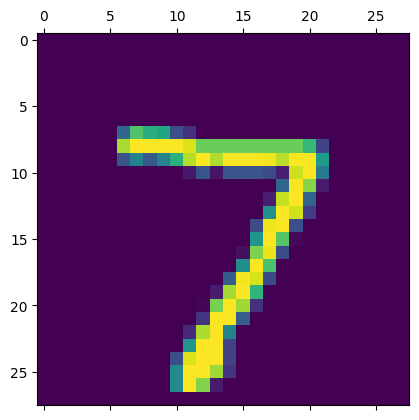

In [14]:
plt.matshow(X_test[0])

In [15]:
np.argmax(y_predicted[2])

1

In [16]:
y_predicted_labels= [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [17]:
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [18]:
cm=tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    0,    3,    1,   11,    6,    1,    1,    0],
       [   0, 1102,    5,    3,    0,    2,    3,    0,   19,    1],
       [  11,    6,  935,   25,    3,    5,   11,    8,   26,    2],
       [   1,    6,   13,  915,    2,   33,    0,   10,   24,    6],
       [   1,    2,    5,    0,  927,    3,   14,    1,    5,   24],
       [  11,    1,    4,   30,    7,  759,    7,    7,   55,   11],
       [  20,    3,    2,    1,    7,   16,  896,    0,   12,    1],
       [   3,   19,   16,   10,   13,    0,    0,  936,    3,   28],
       [   4,    9,    4,    9,    9,   16,    9,    4,  900,   10],
       [   5,    5,    0,   10,   42,   15,    1,   10,   11,  910]])>

In [19]:
import seaborn as sns

Text(33.22222222222222, 0.5, 'Truth')

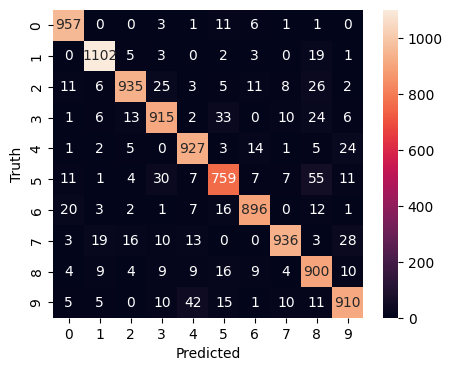

In [20]:
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [21]:
model=keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 966us/step - loss: 0.2759 - accuracy: 0.9207
Epoch 2/5
1875/1875 [==============================] - 2s 983us/step - loss: 0.1240 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 2s 992us/step - loss: 0.0859 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 2s 964us/step - loss: 0.0667 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 2s 998us/step - loss: 0.0523 - accuracy: 0.9841


In [22]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 0s 805us/step - loss: 0.0808 - accuracy: 0.9744


[0.08078891038894653, 0.974399983882904]

313/313 [==============================] - 0s 750us/step


Text(33.22222222222222, 0.5, 'Truth')

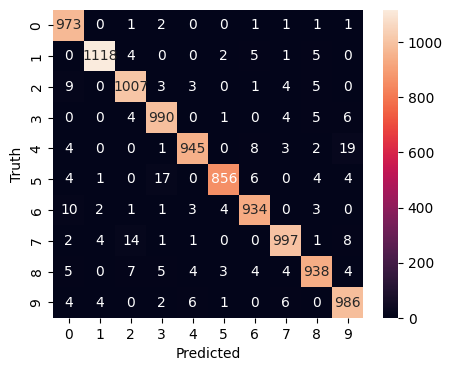

In [23]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels= [np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
cm
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [24]:
from tensorflow import keras
dir(keras)

['Input',
 'Model',
 'Sequential',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__internal__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_sys',
 'activations',
 'applications',
 'backend',
 'callbacks',
 'constraints',
 'datasets',
 'dtensor',
 'estimator',
 'experimental',
 'initializers',
 'layers',
 'losses',
 'metrics',
 'mixed_precision',
 'models',
 'optimizers',
 'preprocessing',
 'regularizers',
 'utils',
 'wrappers']